Sibongakonke Kubheka - 1933028

# Assignment 2 

Bank note authentication using Neural Network

**import the necessary libraries**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Dataset

In [2]:
bank_df = pd.read_csv('/Users/smkubheka/Developer/ACML/Neural_Network /BankNote_Authentication.csv')
bank_df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


**Splitting X into training (80%), validation (10%) and testing set (10%)**

In [3]:
# Shuffling dataset
bank_df = bank_df.sample(frac=1, random_state=4)

# Splitting dataset
total_size = len(bank_df)
print("total_size: ", total_size)

boundaryTrain = round(total_size*0.8)
boundaryValid = boundaryTrain + round(total_size*0.1)

df_train = bank_df.iloc[0:boundaryTrain,:]
df_valid = bank_df.iloc[boundaryTrain:boundaryValid,:]
df_test = bank_df.iloc[boundaryValid:,:]

print("Training size: ", len(df_train))
print("Validation size: ", len(df_valid))
print("Testing size: ", len(df_test))

total_size:  1372
Training size:  1098
Validation size:  137
Testing size:  137


**Splitting features and label**


In [4]:
# Training data 

y_train = df_train['class'].to_numpy()
X_train = df_train.drop(['class'], axis=1).to_numpy()
X_train = preprocessing.normalize(X_train) # normalizing data


# Validation data 

y_valid = df_valid['class'].to_numpy()
X_valid = df_valid.drop(['class'], axis=1).to_numpy()
X_valid = preprocessing.normalize(X_valid)

# Testing data 

y_test = df_test['class'].to_numpy()
X_test = df_test.drop(['class'], axis=1).to_numpy()
X_test = preprocessing.normalize(X_test)


In [5]:
# Transposing data

X_train = X_train.T
y_train = y_train.reshape(len(y_train),1).T

X_valid = X_valid.T
y_valid = y_valid.reshape(len(y_valid),1).T

X_test = X_test.T
y_test = y_test.reshape(len(y_test),1).T

# Model Building 

## Functions

**Activation Functions**

- Sigmoid
- Tanh
- ReLU

In [6]:
# z = Wx + b

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def tanh(Z):
    return (np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)    

def softmax(Z):
    expZ = np.exp(Z)
    return expZ / expZ.sum()

**Derviative of activation function**

These derivative of activation function are used in back propagation.

In [7]:
def sigmoid_deriv(Z):    
    return Z*(1-Z) # my Z is A

def tanh_deriv(Z):
    return 1.0 - pow(tanh(Z),2)

def relu_deriv(Z):
    # Z -> cache
    return np.where(Z >= 0, 1, 0)

## Implementation

In [8]:
class NN():

    def __init__ (self,layer_dims,activation,epochs=10,l_rate=0.001,reg=0):

        """
        Arguments:
        
        layer dims -- list holding the number of nodes in each layer. e.g. [4,5,1]
        activation -- string that specifies the activation function to be used by NN
        epochs -- the number of epochs in gradient descent loop 
        l_rate -- the learning rate 
        reg -- the regularization constant 
        
        """

        self.layer_dims = layer_dims # layer_dims = np.array([784,128,64,10])
        self.activation = activation
        self.epochs = epochs
        self.l_rate = l_rate
        self.reg = reg
        self.loss_history = []

        self.param, self.cache, self.grads = self.initialization()

    def initialization(self):

        '''
        Parameters:
        Initialization of the networks parameters (Weights and biases).
        The weight matrices (a,b) are initialized with random values [0,1), and the bias vectors (b,1) are zeros. 
        
        Cache:
        Dictionaries to store our activations (A) and our dot products (Z)

        Grads:
        Dictionaries to store the derivatives of our parameters (dW and db)

        '''

        W = []
        b = [] 

        dW = []
        db = []
       
        Z = []
        A = []

        cache = {
            'Z':Z,
            'A':A
        }

        grads = {
            'dW':dW,
            'db':db
        }

        np.random.seed(4)

        for l in range(0,len(self.layer_dims)-1):
            W.append(np.random.randn(self.layer_dims[l+1],self.layer_dims[l])*0.01)
            b.append(np.zeros((self.layer_dims[l+1],1)))

        param = {
            'W':W,
            'b':b
        }

        return param, cache, grads

    def activate(self,Z):

        '''
        Performs the chosen activation on our dot product Z. 

        Argument:
        Z -- In

        Output: Activation A 

        '''

        A = None

        if self.activation == 'sigmoid':
            A = sigmoid(Z)

        elif self.activation == 'tanh':
            A = tanh(Z)

        elif self.activation == 'relu':
            A = relu(Z)

        return np.squeeze(A)
        
    def forward_prop(self,x_train):

        """
        Implements forward propagation. 

        Argument:
        X -- dataset of shape (4, number of examples)

        """

        A = []
        A.append(x_train)

        Z = []

        W = self.param['W']
        b = self.param['b']

        for l in range(0,(len(W))):
            
            Z.append(W[l] @ A[l] + b[l])

            if l != len(W)-1:
                A.append(self.activate(Z[l]))
            else:
                A.append(sigmoid(Z[l]))
            
        self.cache = {
            'Z':Z,
            'A':A
        }

    def forward_pass(self,x_train):

        """
        Performs forward propagation but returning the sigmoid output

        Argument:
        X -- dataset of shape (4, number of examples)
        """

        A = []
        A.append(x_train)

        W = self.param['W']
        b = self.param['b']

        for l in range(0,(len(W))):

            Z_l = W[l] @ A[l] + b[l]

            if l != len(W)-1:
                A.append(self.activate(Z_l))
            else:
                A.append(sigmoid(Z_l))

        return A[-1]

    def loss_fn(self,AL,y):
        ''' 
        Loss function: (categorical) cross entropy 

        Arguments:
        AL -- The sigmoid output of the final activation of shape (1,number of examples)
        y -- "true" labels vector of shape (1, number of examples)
        
        Returns: 
        cost - the cross entropy cost 
        '''
        
        m = y.shape[1] # number of example

        cost = (-1 / m) * np.sum((y * np.log(AL)) + ((1 - y) * np.log(1 - AL)))
        cost = float(np.squeeze(cost))

        return cost

    def activate_backwards(self,A):

        '''
        Performs the chosen derivative activation on our activation A 

        Arguments
        A -- Activation A

        Returns: 
        dA -- Derivative of A 
        
        '''

        dA = None

        if self.activation == 'sigmoid':
            dA = sigmoid_deriv(A)

        elif self.activation == 'tanh':
            dA = tanh_deriv(A)

        elif self.activation == 'relu':
            dA = relu_deriv(A)

        return dA

    def backprop(self,y):

        """
        Implement the backward propagation, calculating the gradients dW and db

        Arguments:
        y -- "true" labels vector of shape (1, number of examples)

        """
        m = y.shape[1]

        W = self.param['W']
        b = self.param['b']

        A = self.cache['A']

        dW = []
        db = []

        dZ = A[-1] - y

        for i in range(len(W)-1,-1,-1): 

            dWi = (1/m) * np.dot(dZ,A[i].T) + self.reg * W[i]
            dbi = (1/m) * np.sum(dZ, axis=1, keepdims=True)

            dW.insert(0,dWi)
            db.insert(0,dbi)

            dZ = np.dot(W[i].T,dZ) * self.activate_backwards(A[i])

        self.grads = {
            'dW': dW,
            'db': db
        }

    def update_parameters(self):

        """
        Updates the parameters (W and b) using the gradient descent update rule.

        """

        W = self.param["W"]
        b = self.param["b"]

        dW = self.grads["dW"]
        db = self.grads["db"]
        
        for l in range(0,len(W)):
            W[l] = W[l] - (self.l_rate * dW[l])
            b[l] = b[l] - (self.l_rate * db[l])

        self.params = {
            'W': W,
            'b': b
        }
          
    def plot_loss(self,losses):

        """
        Plot graph.

        Argument: 
        costs -- cost history from training

        """

        x_value=list(range(1,len(losses)+1))
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.plot(x_value,losses,0.,color='g')

    def fit(self,X,y,print_loss=False): # stochastic gradient descent

        """
        Training the parameters. These parameters will be used for predictions. 

        Arguments:
        X -- dataset of shape (4, number of examples)
        Y -- labels of shape (1, number of examples)
        print_cost -- if True, print the cost every x iterations

        """
            
        losses = [] 
        accuracies = []

        for epoch in range(self.epochs):
            
            self.forward_prop(X)
            AL = self.cache["A"][-1]
            self.backprop(y)
            self.update_parameters()
            loss = self.loss_fn(AL,y)
            losses.append(loss)

            if print_loss == True and epoch%100==0:
                print('Epoch {epoch}==> Loss = {loss}'.format(epoch=epoch, loss=loss))

        self.plot_loss(losses)
        self.loss_history = losses

    def predict(self,X):

        """
        Using the learned parameters, predicts a class for each example in X
        
        Arguments:
        X -- input data of size (m, n) : m - no. of features (4), n - no of entries
        
        Returns
        predictions -- vector of predictions of our model (fraudulent : 0 / authentic: 1)

        """
    
        AL = np.squeeze(self.forward_pass(X))
        threshold = 0.5 
        predictions = (AL > threshold)
    
        return predictions.T

    def accuracy(self,y, y_hat):
        return np.mean(y == y_hat)

In [9]:
def plot_compare(train_losses,valid_losses,test_losses):

    x_value=list(range(1,len(train_losses)+1))

    plt.plot(x_value,train_losses)
    plt.plot(x_value,valid_losses)
    plt.plot(x_value,test_losses)

    plt.legend(["Training", "Validation", "Testing"])
    

Epoch 0==> Loss = 0.693222748434071
Epoch 100==> Loss = 0.5870246286088631
Accuracy 0.9626593806921676


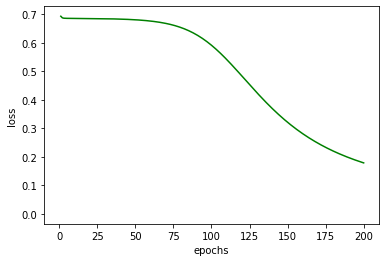

In [10]:
# Checking cell 

epochs = 200
lr = 0.9
reg = 0

layers_dims = np.array([4,5,1])

model_train = NN(layers_dims,"sigmoid",epochs,lr,reg)
model_train.fit(X_train,y_train,True)
train_pred = model_train.predict(X_train)
print("Accuracy", model_train.accuracy(train_pred,y_train))

## Hyperparameter Tuning

For epochs, learning rate, regularization constant 

#### Epochs:

Epoch 0==> Loss = 0.693222748434071
Epoch 100==> Loss = 0.5870246286088631
Epoch 200==> Loss = 0.17727668252073026
Epoch 300==> Loss = 0.09189494165153438
Epoch 400==> Loss = 0.06488910954632936
Epoch 500==> Loss = 0.051566224391015124
Epoch 600==> Loss = 0.043593551493238056
Epoch 700==> Loss = 0.03833199383867363
Epoch 800==> Loss = 0.03462832702297756
Epoch 900==> Loss = 0.03189181726287667
Epoch 1000==> Loss = 0.029791568234074736
Epoch 1100==> Loss = 0.028130052874976448
Epoch 1200==> Loss = 0.0267831555235783
Epoch 1300==> Loss = 0.025669420522849793
Epoch 1400==> Loss = 0.024733331668743166
Epoch 1500==> Loss = 0.023935781194956655
Epoch 1600==> Loss = 0.023248414345999474
Epoch 1700==> Loss = 0.022650151919222736
Epoch 1800==> Loss = 0.02212498111724728
Epoch 1900==> Loss = 0.021660508940542552
Accuracy:  1.0


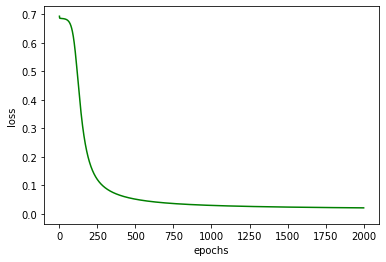

In [11]:
# Check 1 

epochs = 2000
lr = 0.9
reg = 0

layers_dims = np.array([4,5,1])

model = NN(layers_dims,"sigmoid",epochs,lr,reg)
model.fit(X_train,y_train, True)
valid_pred = model.predict(X_valid)
print("Accuracy: ", model.accuracy(valid_pred,y_valid))

Epoch 0==> Loss = 0.693222748434071
Epoch 100==> Loss = 0.5870246286088631
Epoch 200==> Loss = 0.17727668252073026
Epoch 300==> Loss = 0.09189494165153438
Accuracy:  1.0


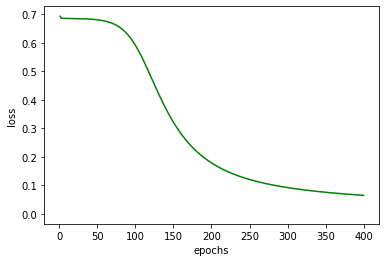

In [12]:
# Check 2 

epochs = 400
lr = 0.9
reg = 0

layers_dims = np.array([4,5,1])

model = NN(layers_dims,"sigmoid",epochs,lr,reg)
model.fit(X_train,y_train, True)
valid_pred = model.predict(X_valid)
print("Accuracy: ", model.accuracy(valid_pred,y_valid))

The chosen epochs bove (check 2) results in the model achieving a perfect able to achieve this perfect accruacy.  Anything above this will achieve a perfect accuracy (check 1) too. Looking at check 1, we can see that even after 2000 iterations, there are still signicicant changes in the size of the loss. This suggests that an epoch that large, and possibly even larger, will be more optimal for the model. 

#### Learning rate:

Accuracy:  0.7737226277372263


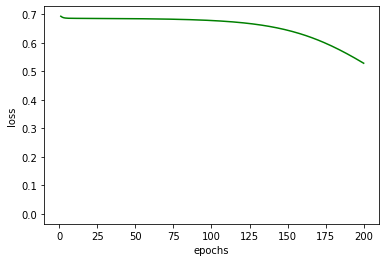

In [13]:
# Check 1 
# Smaller learning rate 

epochs = 200
lr = 0.5
reg = 0

layers_dims = np.array([4,5,1])

model = NN(layers_dims,"sigmoid",epochs,lr,reg)
model.fit(X_train,y_train)
valid_pred = model.predict(X_valid)
print("Accuracy: ", model.accuracy(valid_pred,y_valid))

The learning rate is too low here as it takes longer to converge 

Accuracy:  1.0


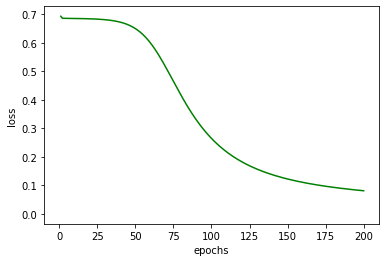

In [14]:
# Check 2 
# Larger learning rate 

epochs = 200
lr = 1.5
reg = 0

layers_dims = np.array([4,5,1])

model = NN(layers_dims,"sigmoid",epochs,lr,reg)
model.forward_prop(X_train)
model.fit(X_train,y_train)
valid_pred = model.predict(X_valid)
print("Accuracy: ", model.accuracy(valid_pred,y_valid))

A larger learning rate does result in a high accuracy still. However, we should be weary here as this will not necessarily translate to that on the test data. The network could be overfitting in this case. 

#### Regularization:

Accuracy:  0.948905109489051


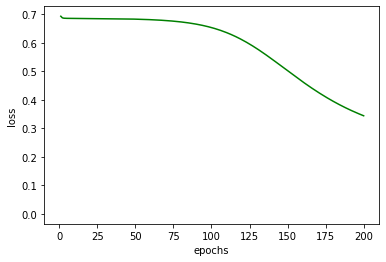

In [15]:
# Check 1
# Small reg constant

epochs = 200
lr = 0.9
reg = 0.01

layers_dims = np.array([4,5,1])

model = NN(layers_dims,"sigmoid",epochs,lr,reg)
model.forward_prop(X_train)
model.fit(X_train,y_train)
valid_pred = model.predict(X_valid)
print("Accuracy: ", model.accuracy(valid_pred,y_valid))

Accuracy:  0.48905109489051096


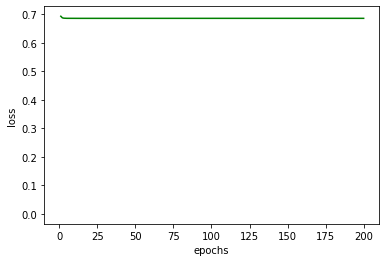

In [16]:
# Check 2
# Larger reg constant

epochs = 200
lr = 0.9
reg = 0.1

layers_dims = np.array([4,5,1])

model = NN(layers_dims,"sigmoid",epochs,lr,reg)
model.forward_prop(X_train)
model.fit(X_train,y_train)
valid_pred = model.predict(X_valid)
print("Accuracy: ", model.accuracy(valid_pred,y_valid))

Increasing the bias by both a small (check 1) and a large amount (check 2) results in no improvement. This could attributed to the fact that the neural network underfits the data more as a result of these changes. This subsequently leads to a poorer performance. 

#### Together:

Accuracy:  1.0


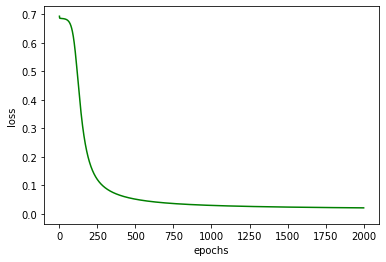

In [17]:
# Validation

epochs = 2000
lr = 0.9
reg = 0

layers_dims = np.array([4,5,1])

model_valid = NN(layers_dims,"sigmoid",epochs,lr,reg)
model_valid.fit(X_train,y_train)
valid_pred= model_valid.predict(X_valid)
print("Accuracy: ", model_valid.accuracy(valid_pred,y_valid))

## Testing

Accuracy:  0.9927007299270073


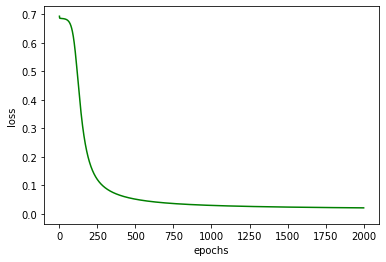

In [18]:
# Test

epochs = 2000
lr = 0.9
reg = 0

layers_dims = np.array([4,5,1])

model_test = NN(layers_dims,"sigmoid",epochs,lr,reg)
model_test.fit(X_train,y_train)
test_pred= model_test.predict(X_test)
print("Accuracy: ", model_test.accuracy(test_pred,y_test))

# Different Activation Functions

## Tanh

0.9927007299270073

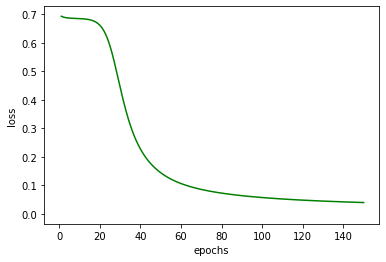

In [28]:
# Tanh

epochs = 150
lr = 0.9
reg = 0

layers_dims = np.array([4,5,1])

model_tan = NN(layers_dims,"tanh",epochs,lr,reg)
model_tan.fit(X_train,y_train)
test_pred = model_tan.predict(X_test)
model_tan.accuracy(test_pred,y_test)

Using tanh as the activation function results in a similar perfomance compared to that of the sigmoid function. Important note, is that tanh is able to achieve this result in fewer iterations. The reason for this is that the derivatives of tanh are more steep, which means it can get more value. This means that it will be more efficient because it has a wider range for faster learning.

## ReLU

/var/folders/gh/gt862nnn0pzcpy32nnk1p8bh0000gn/T/ipykernel_95184/1539597536.py:169: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * np.sum((y * np.log(AL)) + ((1 - y) * np.log(1 - AL)))
/var/folders/gh/gt862nnn0pzcpy32nnk1p8bh0000gn/T/ipykernel_95184/1539597536.py:169: RuntimeWarning: invalid value encountered in multiply
  cost = (-1 / m) * np.sum((y * np.log(AL)) + ((1 - y) * np.log(1 - AL)))


0.9927007299270073

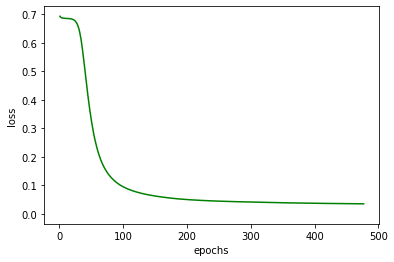

In [20]:
# ReLU 

epochs = 500
lr = 0.9
reg = 0

layers_dims = np.array([4,5,1])

model_rel = NN(layers_dims,"relu",epochs,lr,reg)
model_rel.fit(X_train,y_train)
test_pred = model_rel.predict(X_test)
model_rel.accuracy(test_pred,y_test)

Similar to tanh, ReLu is faster to compute than the sigmoid function, and its derivative is faster to compute. This makes a significant difference to training and inference time for the neural network. Not as fast as tanh though. 

# Exploring the effect of network size on generalizability

### Altering number of hidden layers

Hidden layers: 0

Accuracy:  0.9927007299270073


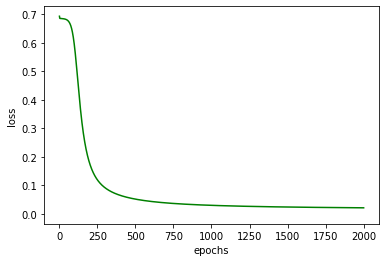

In [21]:
# Checking cell 

epochs = 2000
lr = 0.9
reg = 0

layers_dims = np.array([4,4,1])

model = NN(layers_dims,"sigmoid",epochs,lr,reg)
model.fit(X_train,y_train)
test_pred= model.predict(X_test)
print("Accuracy: ", model.accuracy(test_pred,y_test))

Hidden layers: 1

Accuracy:  0.583941605839416


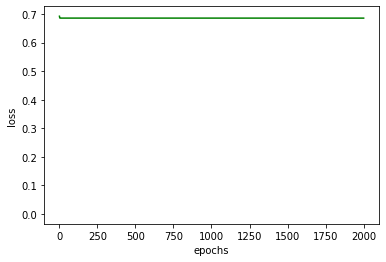

In [22]:
# Checking cell 

epochs = 2000
lr = 0.9
reg = 0

layers_dims = np.array([4,4,4,1])

model_2 = NN(layers_dims,"sigmoid",epochs,lr,reg)
model_2.fit(X_train,y_train)
test_pred_2 = model_2.predict(X_test)
print("Accuracy: ", model.accuracy(test_pred_2,y_test))

Increasing the number of hidden layers allows the network to learn the underlying patterns in the data - improving the results. However, the dangers with increasing the number of hidden layers and having too many hidden layers is overfitting. The network, in this case, is unable to generalize to new unseen data. This is evident when we compare the networks perfomance when it has one hidden layer and when it has two. Having one hidden layer, the neural net performs excetpionally, but adding an extra hidden layer to this results in the neural net performing very poorly 

Hidden layers: 3

Accuracy:  0.583941605839416


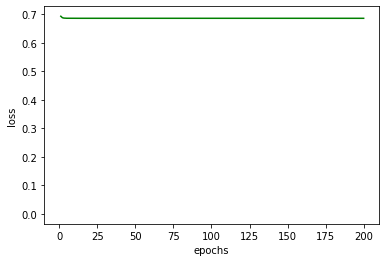

In [23]:
# Checking cell 

epochs = 200
lr = 0.9
reg = 0.1

layers_dims = np.array([4,4,5,4,1])

model_3 = NN(layers_dims,"sigmoid",epochs,lr,reg)
model_3.fit(X_train,y_train)
test_pred_3 = model_3.predict(X_test)
print("Accuracy: ", model_3.accuracy(test_pred_3,y_test))

### Altering the number of neurons 

Accuracy:  0.9781021897810219


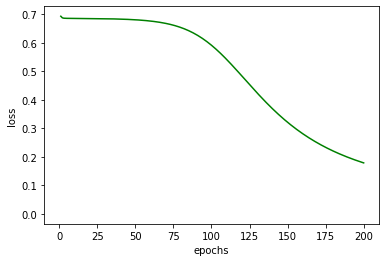

In [24]:
# Check 1: 5 hidden neurons

epochs = 200
lr = 0.9
reg = 0

layers_dims = np.array([4,5,1])

model = NN(layers_dims,"sigmoid",epochs,lr,reg)
model.fit(X_train,y_train)
test_pred = model.predict(X_test)
print("Accuracy: ", model.accuracy(test_pred,y_test))

Accuracy:  0.9708029197080292


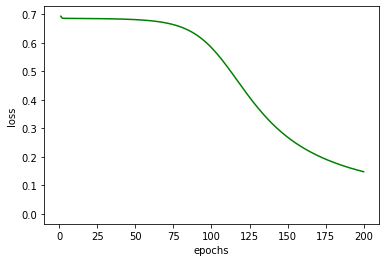

In [25]:
# Check 2: 10 hidden neurons

epochs = 200
lr = 0.9
reg = 0

layers_dims = np.array([4,10,1])

model = NN(layers_dims,"sigmoid",epochs,lr,reg)
model.fit(X_train,y_train)
test_pred = model.predict(X_test)
print("Accuracy: ", model.accuracy(test_pred,y_test))

Increasing the number of neurons in the hidden layer increases the complexity of the neural network. A result of this is that the neural network could overfit. This is shown above as the check 2 has a lower accuracy compared to check 1. Check 2 being a more complex neurla network, it fails to generalize to unseen data more than check 1. The model in check 1 further takes longer to converge.